In [1]:
import pandas as pd
import re
import requests
from nltk.util import bigrams

import time
from datetime import datetime 

In [2]:
df2 = pd.read_csv('sentences_final4.csv')
df2

,sentence,no_change,summarizing
0,והנפיחות בעיניים?,1,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",0,1
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,0,1
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,0,1
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",0,1
...,...,...,...
516,"הורים יקרים,במדריך הזה מפורט התהליך העומד בפני...",0,1
517,מהיום ניתן לקבל את חשבון הארנונה ישירות לדואר...,0,1
518,".תורם לאיכות הסביבה, קבלת חשבון ארנונה תקופתי ...",0,1
519,ניתן לקבל את חשבון הארנונה למייל במילוי טופס.,0,1


In [3]:
start_time = datetime.now() 

words = []
letters = []
word_avg = []
numbers = []
symbols = []
if_question = []

punctuation = []
sym_hashtag = []
sym_shtrudel = []
sym_dollar = []
sym_ampersand = []
sym_percend = []
sym_star = []
sym_tilda = []
sym_math = []
sym_logic = []
sym_brackets = []
sym_num = []
sym_quotes = []
sym_slashes = []

root_l = []
NOUN_l = []
VERB_l = []
ADV_l = []
AUX_l = []
ADJ_l = []
ADP_l = []
PUNCT_l = []

bigrams = []
t_depth = []
mdd = []
q = 0


# def req(sen):
#     for s in sen:
#         no_q = re.sub("\"", "", s)
#         print(no_q)
#         print(s)

#         bigrams.append(len(s.split())-1)

#         r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/process?tokenizer&tagger&parser&data=' + str(s))
#         r_dict = r.json()
#         word_id = r_dict['result']
#         spl = word_id.split()


#         text = no_q
#         #text = s

#         localhost_yap = "http://localhost:8000/yap/heb/joint"
#         data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
#         headers = {'content-type': 'application/json'}
#         response = requests.get(url=localhost_yap, data=data, headers=headers)
#         json_response = response.json()

#         heads_tree = []
#         heads = []
#         #print(q)
#         #q=q+1
#         dep_tree = json_response['dep_tree']
#         dep_tree2 = dep_tree.split()
#         for i in range(len(dep_tree2)):
#             if i<len(dep_tree2)-1:
#                 if dep_tree2[8]=='_' and dep_tree2[9]=='_':
#                     heads_tree.append(dep_tree2[:10])
#                     dep_tree2 = dep_tree2[10::]
#                 else:
#                     heads_tree.append(dep_tree2[:9])
#                     dep_tree2 = dep_tree2[9::]

#         for i in range(len(heads_tree)):
#             if heads_tree[i][6].isnumeric():
#                 heads.append(int(heads_tree[i][6]))
#             elif heads_tree[i][5].isnumeric():
#                 heads.append(int(heads_tree[i][5]))

#         t_depth.append(max(heads))
#         mdd.append(float("{:.2f}".format(sum(heads)/(len(heads)-1))))

#         root = 0
#         NOUN = 0
#         VERB = 0
#         ADV = 0
#         AUX = 0
#         ADJ = 0
#         ADP = 0
#         PUNCT = 0

#         for w in range(len(spl)):
#             if spl[w] == "root":
#                 root=root+1;
#             if spl[w] == "NOUN":
#                 NOUN=NOUN+1;
#             if spl[w] == "VERB":
#                 VERB=VERB+1;
#             if spl[w] == "ADV":
#                 ADV=ADV+1;
#             if spl[w] == "AUX":
#                 AUX=AUX+1;
#             if spl[w] == "ADJ":
#                 ADJ=ADJ+1;
#             if spl[w] == "ADP":
#                 ADP=ADP+1;
#             if spl[w] == "PUNCT":
#                 PUNCT=PUNCT+1;

#         root_l.append(root)
#         NOUN_l.append(NOUN)
#         VERB_l.append(VERB)
#         ADV_l.append(ADV)
#         AUX_l.append(AUX)
#         ADJ_l.append(ADJ)
#         ADP_l.append(ADP)
#         PUNCT_l.append(PUNCT)

#         val = re.findall(r'\w+', s)
#         words.append(len(val))

#         val = re.findall(r'\w', s)
#         letters.append(len(val))

#         val = re.findall(r'\w+', s)
#         average = sum(len(word) for word in val) / len(val)
#         word_avg.append(round(average, 3))

#         val = re.findall(r'[0-9]', s)
#         numbers.append(len(val))

#         val = re.findall(r'[^א-ת0-9 ]', s)
#         symbols.append(len(val))

#         val = re.findall(r'[`!^:;\',.?]', s)
#         punctuation.append(len(val))

#         val = re.findall(r'[#]', s)
#         sym_hashtag.append(len(val))

#         val = re.findall(r'[@]', s)
#         sym_shtrudel.append(len(val))

#         val = re.findall(r'[$]', s)
#         sym_dollar.append(len(val))

#         val = re.findall(r'[&]', s)
#         sym_ampersand.append(len(val))

#         val = re.findall(r'[%]', s)
#         sym_percend.append(len(val))

#         val = re.findall(r'[*]', s)
#         sym_star.append(len(val))

#         val = re.findall(r'[~]', s)
#         sym_tilda.append(len(val))

#         val = re.findall(r'[\+\-\*\/<>=%^]', s)
#         sym_math.append(len(val))

#         val = re.findall(r'[&|]', s)
#         sym_logic.append(len(val))

#         val = re.findall(r'[()[]{}]', s)
#         sym_brackets.append(len(val))

#         val = re.findall(r'[№]', s)
#         sym_num.append(len(val))

#         val = re.findall(r'["\']', s)
#         sym_quotes.append(len(val))

#         val = re.findall(r'[\//]', s)
#         sym_slashes.append(len(val))

#         if s[len(s)-1]=='?':
#             if_question.append(1)
#         else:
#             if_question.append(0)
    


# req(df2.sentence[:5])
    
# for s in df2.sentence:
    
#     no_q = re.sub("\"", "", s)
#     #print(no_q)
#     #print(s)
    
#     bigrams.append(len(s.split())-1)
    
#     r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/process?tokenizer&tagger&parser&data=' + str(s))
#     r_dict = r.json()
#     word_id = r_dict['result']
#     spl = word_id.split()
    
        
#     text = no_q
#     #text = s
    
#     localhost_yap = "http://localhost:8000/yap/heb/joint"
#     data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
#     headers = {'content-type': 'application/json'}
#     response = requests.get(url=localhost_yap, data=data, headers=headers)
#     json_response = response.json()

#     heads_tree = []
#     heads = []
#     print(q)
#     q=q+1
#     dep_tree = json_response['dep_tree']
#     dep_tree2 = dep_tree.split()
#     for i in range(len(dep_tree2)):
#         if i<len(dep_tree2)-1:
#             if dep_tree2[8]=='_' and dep_tree2[9]=='_':
#                 heads_tree.append(dep_tree2[:10])
#                 dep_tree2 = dep_tree2[10::]
#             else:
#                 heads_tree.append(dep_tree2[:9])
#                 dep_tree2 = dep_tree2[9::]
                
#     for i in range(len(heads_tree)):
#         if heads_tree[i][6].isnumeric():
#             heads.append(int(heads_tree[i][6]))
#         elif heads_tree[i][5].isnumeric():
#             heads.append(int(heads_tree[i][5]))
        
#     t_depth.append(max(heads))
#     mdd.append(float("{:.2f}".format(sum(heads)/(len(heads)-1))))

#     root = 0
#     NOUN = 0
#     VERB = 0
#     ADV = 0
#     AUX = 0
#     ADJ = 0
#     ADP = 0
#     PUNCT = 0

#     for w in range(len(spl)):
#         if spl[w] == "root":
#             root=root+1;
#         if spl[w] == "NOUN":
#             NOUN=NOUN+1;
#         if spl[w] == "VERB":
#             VERB=VERB+1;
#         if spl[w] == "ADV":
#             ADV=ADV+1;
#         if spl[w] == "AUX":
#             AUX=AUX+1;
#         if spl[w] == "ADJ":
#             ADJ=ADJ+1;
#         if spl[w] == "ADP":
#             ADP=ADP+1;
#         if spl[w] == "PUNCT":
#             PUNCT=PUNCT+1;
            
#     root_l.append(root)
#     NOUN_l.append(NOUN)
#     VERB_l.append(VERB)
#     ADV_l.append(ADV)
#     AUX_l.append(AUX)
#     ADJ_l.append(ADJ)
#     ADP_l.append(ADP)
#     PUNCT_l.append(PUNCT)
    
#     val = re.findall(r'\w+', s)
#     words.append(len(val))
    
#     val = re.findall(r'\w', s)
#     letters.append(len(val))
    
#     val = re.findall(r'\w+', s)
#     average = sum(len(word) for word in val) / len(val)
#     word_avg.append(round(average, 3))
    
#     val = re.findall(r'[0-9]', s)
#     numbers.append(len(val))
    
#     val = re.findall(r'[^א-ת0-9 ]', s)
#     symbols.append(len(val))
    
#     val = re.findall(r'[`!^:;\',.?]', s)
#     punctuation.append(len(val))
    
#     val = re.findall(r'[#]', s)
#     sym_hashtag.append(len(val))
    
#     val = re.findall(r'[@]', s)
#     sym_shtrudel.append(len(val))
    
#     val = re.findall(r'[$]', s)
#     sym_dollar.append(len(val))
    
#     val = re.findall(r'[&]', s)
#     sym_ampersand.append(len(val))
    
#     val = re.findall(r'[%]', s)
#     sym_percend.append(len(val))
    
#     val = re.findall(r'[*]', s)
#     sym_star.append(len(val))
    
#     val = re.findall(r'[~]', s)
#     sym_tilda.append(len(val))
    
#     val = re.findall(r'[\+\-\*\/<>=%^]', s)
#     sym_math.append(len(val))
    
#     val = re.findall(r'[&|]', s)
#     sym_logic.append(len(val))
    
#     val = re.findall(r'[()[]{}]', s)
#     sym_brackets.append(len(val))
    
#     val = re.findall(r'[№]', s)
#     sym_num.append(len(val))
    
#     val = re.findall(r'["\']', s)
#     sym_quotes.append(len(val))
    
#     val = re.findall(r'[\//]', s)
#     sym_slashes.append(len(val))
    
#     if s[len(s)-1]=='?':
#         if_question.append(1)
#     else:
#         if_question.append(0)
        
#     time.sleep(10)

print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Time elapsed in (hh:mm:ss.ms): "0:00:00.000432"


In [4]:
for s in df2.sentence:
    
    bigrams.append(len(s.split())-1)
    
    r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/process?tokenizer&tagger&parser&data=' + str(s))
    r_dict = r.json()
    word_id = r_dict['result']
    spl = word_id.split()

    root = 0
    NOUN = 0
    VERB = 0
    ADV = 0
    AUX = 0
    ADJ = 0
    ADP = 0
    PUNCT = 0

    for w in range(len(spl)):
        if spl[w] == "root":
            root=root+1;
        if spl[w] == "NOUN":
            NOUN=NOUN+1;
        if spl[w] == "VERB":
            VERB=VERB+1;
        if spl[w] == "ADV":
            ADV=ADV+1;
        if spl[w] == "AUX":
            AUX=AUX+1;
        if spl[w] == "ADJ":
            ADJ=ADJ+1;
        if spl[w] == "ADP":
            ADP=ADP+1;
        if spl[w] == "PUNCT":
            PUNCT=PUNCT+1;
            
    root_l.append(root)
    NOUN_l.append(NOUN)
    VERB_l.append(VERB)
    ADV_l.append(ADV)
    AUX_l.append(AUX)
    ADJ_l.append(ADJ)
    ADP_l.append(ADP)
    PUNCT_l.append(PUNCT)
    
    val = re.findall(r'\w+', s)
    words.append(len(val))
    
    val = re.findall(r'\w', s)
    letters.append(len(val))
    
    val = re.findall(r'\w+', s)
    average = sum(len(word) for word in val) / len(val)
    word_avg.append(round(average, 3))
    
    val = re.findall(r'[0-9]', s)
    numbers.append(len(val))
    
    val = re.findall(r'[^א-ת0-9 ]', s)
    symbols.append(len(val))
    
    val = re.findall(r'[`!^:;\',.?]', s)
    punctuation.append(len(val))
    
    val = re.findall(r'[#]', s)
    sym_hashtag.append(len(val))
    
    val = re.findall(r'[@]', s)
    sym_shtrudel.append(len(val))
    
    val = re.findall(r'[$]', s)
    sym_dollar.append(len(val))
    
    val = re.findall(r'[&]', s)
    sym_ampersand.append(len(val))
    
    val = re.findall(r'[%]', s)
    sym_percend.append(len(val))
    
    val = re.findall(r'[*]', s)
    sym_star.append(len(val))
    
    val = re.findall(r'[~]', s)
    sym_tilda.append(len(val))
    
    val = re.findall(r'[\+\-\*\/<>=%^]', s)
    sym_math.append(len(val))
    
    val = re.findall(r'[&|]', s)
    sym_logic.append(len(val))
    
    val = re.findall(r'[()[]{}]', s)
    sym_brackets.append(len(val))
    
    val = re.findall(r'[№]', s)
    sym_num.append(len(val))
    
    val = re.findall(r'["\']', s)
    sym_quotes.append(len(val))
    
    val = re.findall(r'[\//]', s)
    sym_slashes.append(len(val))
    
    if s[len(s)-1]=='?':
        if_question.append(1)
    else:
        if_question.append(0)
        
    

print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Time elapsed in (hh:mm:ss.ms): "0:02:34.253578"


In [5]:
# for s in df2.sentence:
    
#     no_q = re.sub("\"", "", s)
#     #print(no_q)
#     #print(s)
    
#     text = no_q
#     #text = s
    
#     localhost_yap = "http://localhost:8000/yap/heb/joint"
#     data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
#     headers = {'content-type': 'application/json'}
#     response = requests.get(url=localhost_yap, data=data, headers=headers)
#     json_response = response.json()

#     heads_tree = []
#     heads = []
#     print(q)
#     q=q+1
#     dep_tree = json_response['dep_tree']
#     dep_tree2 = dep_tree.split()
#     for i in range(len(dep_tree2)):
#         if i<len(dep_tree2)-1:
#             if dep_tree2[8]=='_' and dep_tree2[9]=='_':
#                 heads_tree.append(dep_tree2[:10])
#                 dep_tree2 = dep_tree2[10::]
#             else:
#                 heads_tree.append(dep_tree2[:9])
#                 dep_tree2 = dep_tree2[9::]
                
#     for i in range(len(heads_tree)):
#         if heads_tree[i][6].isnumeric():
#             heads.append(int(heads_tree[i][6]))
#         elif heads_tree[i][5].isnumeric():
#             heads.append(int(heads_tree[i][5]))
        
#     t_depth.append(max(heads))
#     mdd.append(float("{:.2f}".format(sum(heads)/(len(heads)-1))))
    
#     #time.sleep(5)
    
#     spl = dep_tree2

#     root = 0
#     NOUN = 0
#     VERB = 0
#     ADV = 0
#     AUX = 0
#     ADJ = 0
#     ADP = 0
#     PUNCT = 0

#     for w in range(len(spl)):
#         if spl[w] == "root":
#             root=root+1;
#         if spl[w] == "NOUN":
#             NOUN=NOUN+1;
#         if spl[w] == "VERB":
#             VERB=VERB+1;
#         if spl[w] == "ADV":
#             ADV=ADV+1;
#         if spl[w] == "AUX":
#             AUX=AUX+1;
#         if spl[w] == "ADJ":
#             ADJ=ADJ+1;
#         if spl[w] == "ADP":
#             ADP=ADP+1;
#         if spl[w] == "PUNCT":
#             PUNCT=PUNCT+1;
            
#     root_l.append(root)
#     NOUN_l.append(NOUN)
#     VERB_l.append(VERB)
#     ADV_l.append(ADV)
#     AUX_l.append(AUX)
#     ADJ_l.append(ADJ)
#     ADP_l.append(ADP)
#     PUNCT_l.append(PUNCT)
    
# print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

In [7]:
df3 = pd.DataFrame({'sentence' : df2.sentence,
                    #'mdd' : mdd,
                    #'t_depth' : t_depth,
                    'no_change' : df2.no_change,
                    'summarizing' : df2.summarizing,
                    'bigrams' : bigrams,
                    'root' : root_l,
                    'NOUN': NOUN_l,
                    'VERB': VERB_l,
                    'ADV': ADV_l,
                    'AUX': AUX_l,
                    'ADJ': ADJ_l,
                    'ADP': ADP_l,
                    'PUNCT': PUNCT_l,
                    'words': words, 
                    'letters': letters, 
                    'word_avg': word_avg,
                    'numbers': numbers, 
                    'symbols': symbols,
                    'if_question': if_question,
                    'punctuation': punctuation,
                    'sym_hashtag': sym_hashtag,
                    'sym_shtrudel': sym_shtrudel,
                    'sym_dollar': sym_dollar,
                    'sym_ampersand': sym_ampersand,
                    'sym_percend': sym_percend,
                    'sym_star': sym_star,
                    'sym_tilda': sym_tilda,
                    'sym_math': sym_math,
                    'sym_logic': sym_logic,
                    'sym_brackets': sym_brackets,
                    'sym_num': sym_num,
                    'sym_quotes': sym_quotes,
                    'sym_slashes': sym_slashes})

df3.head()

,sentence,no_change,summarizing,bigrams,root,NOUN,VERB,ADV,AUX,ADJ,...,sym_ampersand,sym_percend,sym_star,sym_tilda,sym_math,sym_logic,sym_brackets,sym_num,sym_quotes,sym_slashes
0,והנפיחות בעיניים?,1,0,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",0,1,25,1,12,3,7,0,1,...,0,0,0,0,1,0,0,0,0,0
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,0,1,19,1,9,4,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,0,1,25,1,16,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",0,1,24,1,18,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0


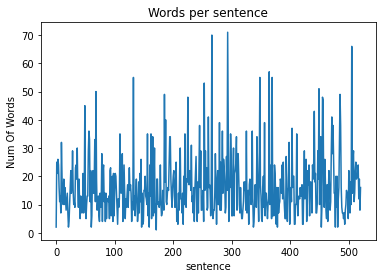

In [8]:
import matplotlib.pyplot as plt
l = df3.index
plt.plot(l, words)                                             
plt.xlabel('sentence')
plt.ylabel('Num Of Words')
plt.xticks()
plt.title('Words per sentence')
plt.yticks()
plt.style.use('default')
plt.show()

In [13]:
#df3.to_csv('before_api.csv', index = False)

In [14]:
bef = pd.read_csv('before_api.csv')
bef

,sentence,no_change,summarizing,bigrams,root,NOUN,VERB,ADV,AUX,ADJ,...,sym_ampersand,sym_percend,sym_star,sym_tilda,sym_math,sym_logic,sym_brackets,sym_num,sym_quotes,sym_slashes
0,והנפיחות בעיניים?,1,0,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",0,1,25,1,12,3,7,0,1,...,0,0,0,0,1,0,0,0,0,0
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,0,1,19,1,9,4,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,0,1,25,1,16,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",0,1,24,1,18,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,"הורים יקרים,במדריך הזה מפורט התהליך העומד בפני...",0,1,22,1,14,3,4,0,1,...,0,0,0,0,0,0,0,0,0,0
517,מהיום ניתן לקבל את חשבון הארנונה ישירות לדואר...,0,1,11,1,6,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0
518,".תורם לאיכות הסביבה, קבלת חשבון ארנונה תקופתי ...",0,1,18,1,12,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
519,ניתן לקבל את חשבון הארנונה למייל במילוי טופס.,0,1,7,1,5,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 1. how many trees (number of nodes, number of leaves, tree depth and number of simple sentences) in each sentence
# 2. dependency parcer (dependency parse tree?) / mean dependency distance?
# 3. how many roots

# 4. MDD (Mean Dependency Distance)[27], also known as average dependency
#    distances (ADD), is a feature that appears to be on top of the affecting features.
#    It measures the sum of the depth of all nodes in the dependency tree divided by
#    the total number of dependencies. For example the MDD score of the sentence
#    “Sarah read the book quickly and understood it correctly” (see Figure 1) is
#    19=8 = 2:735 (for details see [38]).

# 5. Sentence perplexity - Reflecting the degree to which the observed word sequence
#    in the sentence is “expected” compared to what has been observed in the corpus.
#    We used bi-grams Maximum Likelihood Estimator (MLE ^3) model’s scores.
#    ^3Using NLTK machine learning library https://www.nltk.org/api/nltk.lm.html

# 6. NLU
#    Language Model estimation - We use BERT ^4, a large scaled pretrained bidirectional
#    language model, to give a score for each sentence using a Natural
#    Language Understanding (NLU) reasoning technique, based on the average Perplexity
#    of the resulting sentence. We follow [37] and assisted with the BERT
#    baseline implementation of [45].
#    ^4bert-base-uncased pre-trained model https://github.com/huggingface/transformers

# 7. use ONLP site

In [ ]:
print(df3['sentence'][320])

In [ ]:
r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/process?tokenizer&tagger&parser&data=' + str(df3['sentence'][320]))
r_dict = r.json()
word_id = r_dict['result']
spl = word_id.split()

num = 0
for w in range(len(spl)):
        if spl[w] == "root":
            print(spl[w])
            num=num+1;
print(word_id)

In [ ]:
# import requests
# text = 'גנן גידל דגן בגן'
# localhost_yap = "http://localhost:8000/yap/heb/joint"
# data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
# headers = {'content-type': 'application/json'}
# response = requests.get(url=localhost_yap, data=data, headers=headers)
# json_response = response.json()

In [3]:
#for s in df2.sentence:

t = df2.sentence[520]
print(t)

t = re.sub("\"", "", t)

#text = 'גנן גידל דגן בגן'
text = t
localhost_yap = "http://localhost:8000/yap/heb/joint"
data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
headers = {'content-type': 'application/json'}
response = requests.get(url=localhost_yap, data=data, headers=headers)
json_response = response.json()

# ma_lattice = json_response['ma_lattice']
# print(ma_lattice)

# md_lattice = json_response['md_lattice']
# print(md_lattice)

dep_tree = json_response['dep_tree']
print(dep_tree)

print(dep_tree.split())

חשבון הארנונה בדואר האלקטרוני מגיע כשהוא מאובטח ומי שאין לו הרשאה אינו יכול לצפות בפרטי השובר.
1	חשבון	חשבון	NNT	NNT	gen=M|num=S	9	subj	_	_
2	ה	ה	DEF	DEF		3	def	_	_
3	ארנונה	ארנונה	NN	NN	gen=F|num=S	1	gobj	_	_
4	ב	ב	PREPOSITION	PREPOSITION		1	prepmod	_	_
5	ה	ה	DEF	DEF		6	def	_	_
6	דואר	דואר	NN	NN	gen=M|num=S	4	pobj	_	_
7	ה	ה	DEF	DEF		8	def	_	_
8	אלקטרוני	אלקטרוני	JJ	JJ	gen=M|num=S	6	amod	_	_
9	מגיע	הגיע	BN	BN	gen=M|num=S|per=A	0	ROOT	_	_
10	כש	כש	TEMP	TEMP		9	ccomp	_	_
11	הוא	הוא	PRP	PRP	gen=M|num=S|per=3	12	subj	_	_
12	מאובטח	אובטח	BN	BN	gen=M|num=S|per=A	13	conj	_	_
13	ו	ו	CONJ	CONJ		10	ccomp	_	_
14	מי	מי	QW	QW		21	subj	_	_
15	ש	ש	REL	REL		14	rcmod	_	_
16	אין	אין	EX	EX		15	relcomp	_	_
17	ל	ל	IN	IN		16	prepmod	_	_
18	הוא	הוא	S_PRN	S_PRN	gen=M|num=S|per=3	17	pobj	_	_
19	הרשאה	הרשאה	NN	NN	gen=F|num=S	16	subj	_	_
20	אינו	אינו	COP	COP	gen=M|num=S|per=3	21	neg	_	_
21	יכול	יכול	MD	MD	gen=M|num=S|per=A	13	conj	_	_
22	לצפות	צפה	VB	VB		21	xcomp	_	_
23	ב	ב	PREPOSITION	PREPOSITION		22	prepmod	_	

In [4]:
#text = 'גנן גידל דגן בגן'

text = t
localhost_yap = "http://localhost:8000/yap/heb/joint"
data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
headers = {'content-type': 'application/json'}
response = requests.get(url=localhost_yap, data=data, headers=headers)
json_response = response.json()

heads_tree = []
heads = []
dep_tree = json_response['dep_tree']
dep_tree2 = dep_tree.split()
for i in range(len(dep_tree2)):
    if i<len(dep_tree2)-1:
        if dep_tree2[7]=='_' and dep_tree2[8]=='_':
            heads_tree.append(dep_tree2[:9])
            dep_tree2 = dep_tree2[9::]
        elif dep_tree2[8]=='_' and dep_tree2[9]=='_':
            #print(dep_tree2[:10])
            heads_tree.append(dep_tree2[:10])
            dep_tree2 = dep_tree2[10::]
            #print(len(l))
        else:
            #print(dep_tree2[:9])
            heads_tree.append(dep_tree2[:9])
            dep_tree2 = dep_tree2[9::]
            #print(len(l))
            
for i in range(len(heads_tree)):
    if heads_tree[i][6].isnumeric():
        #print(heads_tree[i][6])
        heads.append(int(heads_tree[i][6]))
    elif heads_tree[i][5].isnumeric():
        #print(heads_tree[i][5])
        heads.append(int(heads_tree[i][5]))
        
t_depth = max(heads)
if (len(heads)-1)==0:
    mdd = (float("{:.2f}".format(sum(heads))))
else:
    mdd = (float("{:.2f}".format(sum(heads)/(len(heads)-1))))

# root = 0
# for w in range(len(dep_tree.split())):
#     if dep_tree.split()[w] == "NN":
#         root=root+1; 
#     if dep_tree.split()[w] == "VB":
#         root=root+1;
#     if dep_tree.split()[w] == "JJ":
#         NOUN=NOUN+1;
#     if dep_tree.split()[w] == "PREPOSITION":
#         ADV=ADV+1;
#     if dep_tree.split()[w] == "DEF":
#         AUX=AUX+1;
#     if dep_tree.split()[w] == "CONJ":
#         ADJ=ADJ+1;
#     if dep_tree.split()[w] == "BN":
#         ADP=ADP+1;
#     if dep_tree.split()[w] == "NNP":
#         PUNCT=PUNCT+1;
#     if dep_tree.split()[w] == "NNT":
#         ADJ=ADJ+1;
#     if dep_tree.split()[w] == "TEMP":
#         ADP=ADP+1;
#     if dep_tree.split()[w] == "RB":
#         PUNCT=PUNCT+1;
#     if dep_tree.split()[w] == "CC":
#         ADJ=ADJ+1;
#     if dep_tree.split()[w] == "AT":
#         ADP=ADP+1;
#     if dep_tree.split()[w] == "QW":
#         PUNCT=PUNCT+1;
#     if dep_tree.split()[w] == "REL":
#         ADJ=ADJ+1;
#     if dep_tree.split()[w] == "PRP":
#         ADP=ADP+1;
#     if dep_tree.split()[w] == "IN":
#         PUNCT=PUNCT+1;
#     if dep_tree.split()[w] == "DTT":
#         ADJ=ADJ+1;
#     if dep_tree.split()[w] == "DT":
#         ADP=ADP+1;
#     if dep_tree.split()[w] == "MD":
#         PUNCT=PUNCT+1;

In [5]:
#heads

In [6]:
(t_depth,mdd)

(23, 12.22)

In [138]:
mdd

3.0

In [ ]:
df2.sentence[16]

In [ ]:
df2.sentence[13]

In [ ]:

# #k = 0
# j = 10
# for i in range(len(dep_tree.split())):
#     if dep_tree.split()[i*10+9]!='_':
#         print(dep_tree.split()[i*j+5])
#         #k=k+2
#         j=j
#     else:
#         print(dep_tree.split()[i*j+6])
#         #k=k+1
    
#for w in dep_tree.split():
    #print(w)


# for i in range(len(dep_tree.split())):
#     if dep_tree.split()[i*10+5].isnumeric():
#         print(dep_tree.split()[i*10+5])
#     else:
#         print(dep_tree.split()[i*10+6])

# l = []
# for i in range(len(dep_tree.split())):
#     if i<len(dep_tree.split())-1:
#         if dep_tree.split()[i]=='_' and dep_tree.split()[i+1]=='_':
#             l.append(dep_tree.split()[:10])
#             dep_tree.split()[10::]
#             print(len(l))
